In [1]:
# imports
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Reading datasets
main_train = pd.read_csv("training_set.csv")
test_dataset = pd.read_csv("test_set.csv")

main_X_train = main_train.values[:,:-1]
main_y_train = main_train.values[:,-1]

train_dataset = main_train[:800]
val_dataset = main_train[800:]

X_train = train_dataset.values[:,:-1]
y_train = train_dataset.values[:,-1]

X_val = val_dataset.values[:,:-1]
y_val = val_dataset.values[:,-1]

X_test = test_dataset.values 

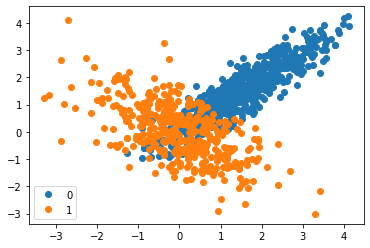

In [4]:
groups = main_train.groupby("y")
for name, group in groups:
    plt.plot(group["x1"], group["x2"], marker="o", linestyle="", label=name)
plt.legend()

In [5]:
def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [6]:
def get_mu_std(dataset):
    m_1 = [dataset[dataset['y'] ==0]['x1'].mean() , dataset[dataset['y'] ==0]['x2'].mean()]
    m_2 = [dataset[dataset['y'] ==1]['x1'].mean() , dataset[dataset['y'] ==1]['x2'].mean()]


    cov_1 = dataset[dataset['y'] ==0][["x1" , "x2"]].cov().to_numpy()
    cov_2 = dataset[dataset['y'] ==1][["x1" , "x2"]].cov().to_numpy()
    return [m_1 , m_2] , [cov_1 , cov_2]

# Validation

In [7]:
# get mu and cov from train part
mu_list , cov_list = get_mu_std(train_dataset)

# predict
Y_pred = np.array([predict_Bayes_class(x,mu_list,cov_list) for x in X_val ] )
acc = np.sum(Y_pred == y_val)/len(y_val)
print(acc)

0.875


# Test

In [8]:
# get mu and cov from train part
mu_list , cov_list = get_mu_std(main_train)

# predict
Y_pred = np.array([predict_Bayes_class(x,mu_list,cov_list) for x in X_test ] )
Y_pred = np.where(Y_pred == 0 , -1 , 1)
Y_pred

array([-1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1

In [9]:
Y_pred.shape

(250,)

In [12]:
pd.DataFrame(Y_pred).to_csv("1.csv" , index=None)

In [13]:
pd.read_csv("1.csv")

,0
0,-1
1,1
2,1
3,1
4,-1
...,...
245,-1
246,1
247,-1
248,1


In [14]:
o1 = pd.read_csv("1.csv")
o2 = pd.read_csv("2.csv")
o3 = pd.read_csv("3.csv")
o4 = pd.read_csv("4.csv")

In [16]:
final = pd.concat([o1, o2 , o3 , o4], ignore_index=True , axis  = 1)

In [17]:
final.to_csv("final.csv" , index=None)

In [18]:
pd.read_csv("final.csv")

,0,1,2,3
0,-1,-1,-1,-1
1,1,1,1,1
2,1,1,1,-1
3,1,1,1,-1
4,-1,-1,-1,-1
...,...,...,...,...
245,-1,-1,-1,-1
246,1,1,1,1
247,-1,-1,-1,-1
248,1,1,1,-1
